<a href="https://colab.research.google.com/github/julian56901/Blog-Personal/blob/main/Ejercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 3

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

3.1

In [15]:
def plotClusters(A, C, dimX, dimY, dimZ=None, ax=None):

    if ax is None:
        if dimZ is None:
            fig, ax = plt.subplots()
        else:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

    C = np.array(C)

    clusters = np.unique(C)

    colors = plt.cm.tab20(np.linspace(0, 1, len(clusters)))
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'd', '|', '_']

    cluster_colors = {}
    cluster_markers = {}
    for idx, cluster in enumerate(clusters):
        cluster_colors[cluster] = colors[idx % len(colors)]
        cluster_markers[cluster] = markers[idx % len(markers)]

    for cluster in clusters:
        indices = np.where(C == cluster)[0]
        X = A[indices, dimX]
        Y = A[indices, dimY]
        if dimZ is not None:
            Z = A[indices, dimZ]
            ax.scatter(X, Y, Z, c=[cluster_colors[cluster]], marker=cluster_markers[cluster], label=f'Cluster {cluster}')
        else:
            ax.scatter(X, Y, c=[cluster_colors[cluster]], marker=cluster_markers[cluster], label=f'Cluster {cluster}')

    ax.set_xlabel(f'Dimensión {dimX}')
    ax.set_ylabel(f'Dimensión {dimY}')
    if dimZ is not None:
        ax.set_zlabel(f'Dimensión {dimZ}')
    ax.legend()

    return ax


3.2

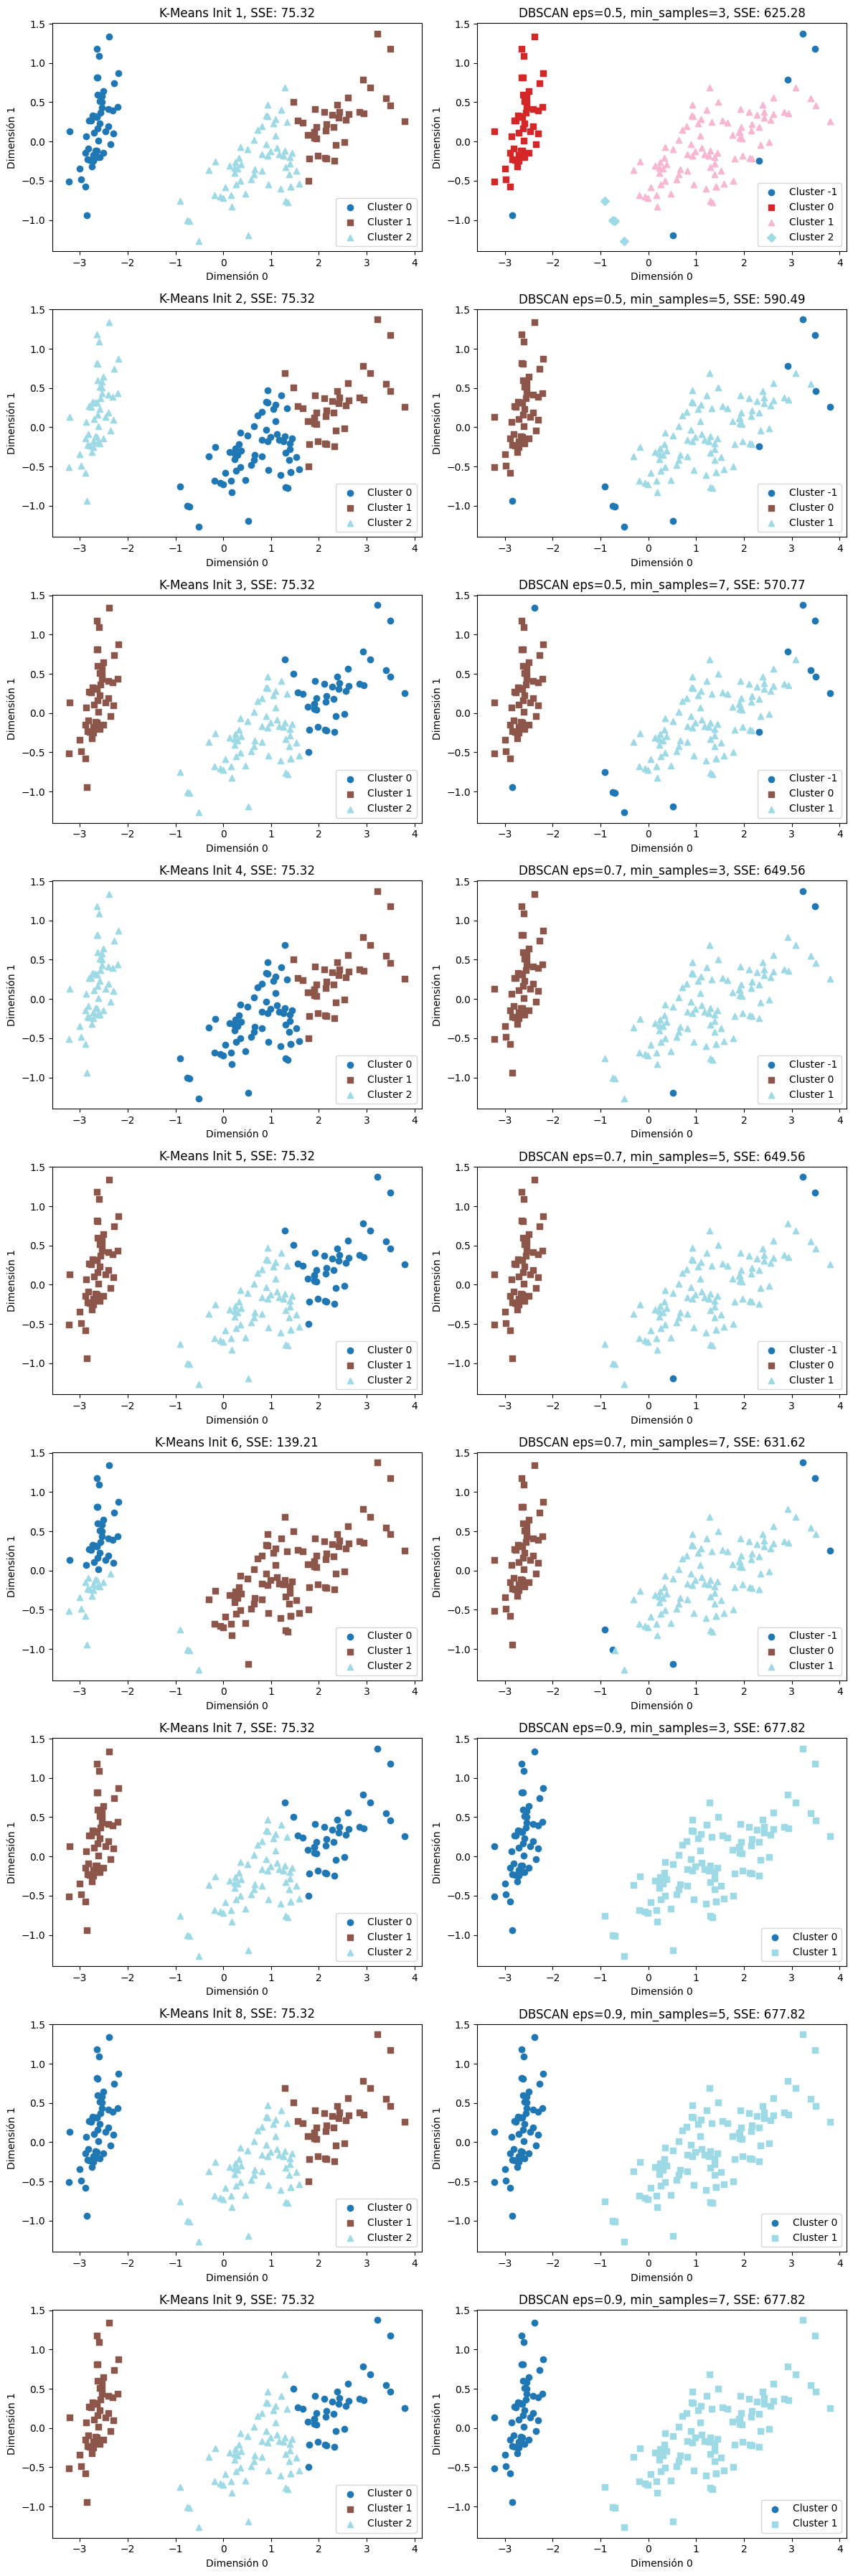

El mejor clustering es con K-Means con SSE = 75.32
El mejor clustering fue producido por K-Means.


In [16]:
iris = load_iris()
X = iris.data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

k = 3
kmeans_inits = 9
dbscan_eps_values = [0.5, 0.7, 0.9]
dbscan_min_samples_values = [3, 5, 7]

fig, axes = plt.subplots(9, 2, figsize=(12, 36))

sse_list = []
clusterings = []

for i in range(kmeans_inits):
    kmeans = KMeans(n_clusters=k, init='random', n_init=1, max_iter=300, random_state=i)
    kmeans.fit(X_pca)
    labels = kmeans.labels_
    sse = kmeans.inertia_
    sse_list.append(sse)
    clusterings.append(('K-Means', labels))
    ax = axes[i, 0]
    plotClusters(X_pca, labels, 0, 1, ax=ax)
    ax.set_title(f'K-Means Init {i+1}, SSE: {sse:.2f}')

index = 0
for eps in dbscan_eps_values:
    for min_samples in dbscan_min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_pca)
        core_samples_mask = labels != -1
        if len(set(labels)) > 1 and np.sum(core_samples_mask) > 0:
            sse = np.sum((X_pca[core_samples_mask] - np.mean(X_pca[core_samples_mask], axis=0)) ** 2)
        else:
            sse = np.nan
        sse_list.append(sse)
        clusterings.append(('DBSCAN', labels))
        ax = axes[index, 1]
        plotClusters(X_pca, labels, 0, 1, ax=ax)
        ax.set_title(f'DBSCAN eps={eps}, min_samples={min_samples}, SSE: {sse:.2f}')
        index += 1

plt.tight_layout()
plt.show()

min_sse = np.nanmin(sse_list)
best_index = np.nanargmin(sse_list)
best_method, best_labels = clusterings[best_index]
print(f'El mejor clustering es con {best_method} con SSE = {min_sse:.2f}')

if best_method == 'K-Means':
    print('El mejor clustering fue producido por K-Means.')
else:
    print('El mejor clustering fue producido por DBSCAN.')
